<a href="https://colab.research.google.com/github/JaniShreyas/TensorflowOverview/blob/main/TensorflowOverview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from time import monotonic
from sklearn.model_selection import train_test_split
from functools import partial


In [ ]:
(XFull, yFull), (XTest, yTest) = mnist.load_data()

In [ ]:
XFull = XFull/255
XTest = XTest/255

In [ ]:
XFull.shape, yFull.shape

((60000, 28, 28), (60000,))

In [ ]:
yFull.shape, yTest.shape

((60000,), (10000,))

In [ ]:
XTrain, XValid, yTrain, yValid = train_test_split(XFull, yFull, train_size = 0.8)

In [ ]:
XTrain.shape, XValid.shape, XTest.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [ ]:
yTrain.shape, yValid.shape, yTest.shape

((48000,), (12000,), (10000,))

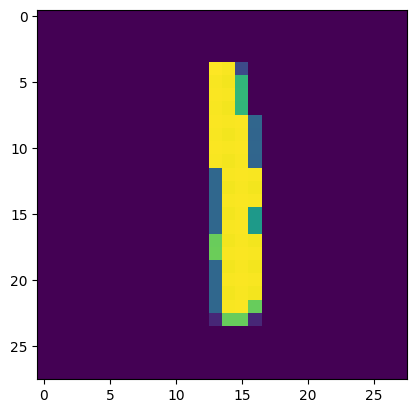

In [ ]:
plt.imshow(XTrain[0])

In [ ]:
XTrain = XTrain.reshape(XTrain.shape[0], XTrain.shape[1] * XTrain.shape[2])
XValid = XValid.reshape(XValid.shape[0], XValid.shape[1] * XValid.shape[2])
XTest = XTest.reshape(XTest.shape[0], XTest.shape[1] * XTest.shape[2])

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 784),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6384 - accuracy: 0.8410 - val_loss: 0.3419 - val_accuracy: 0.9048
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2948 - accuracy: 0.9168 - val_loss: 0.2702 - val_accuracy: 0.9235
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9320 - val_loss: 0.2367 - val_accuracy: 0.9338
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2086 - accuracy: 0.9416 - val_loss: 0.2077 - val_accuracy: 0.9418
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1835 - accuracy: 0.9482 - val_loss: 0.1882 - val_accuracy: 0.9471
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9536 - val_loss: 0.1709 - val_accuracy: 0.9503
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9582 - val_loss: 0.1595 - val_accuracy:

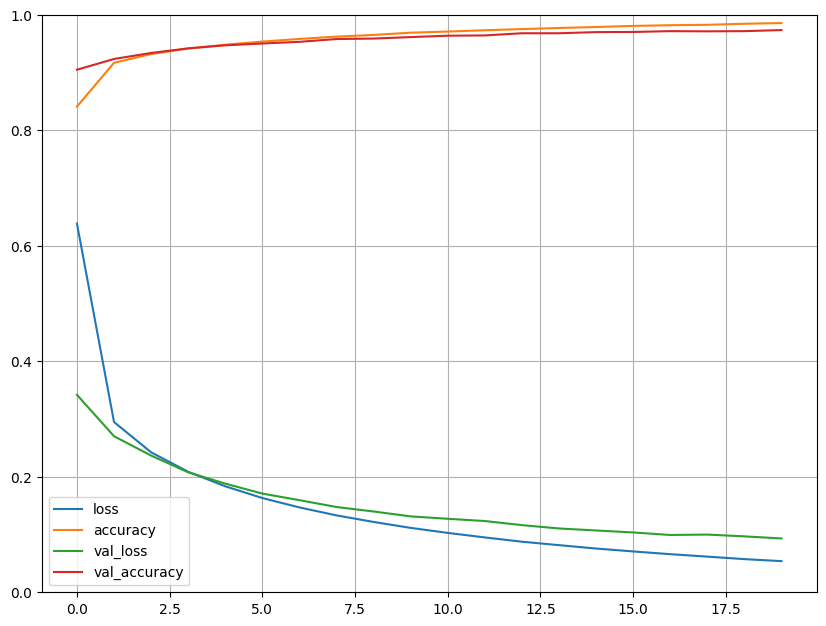

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(XTest, yTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9754


[0.08275844156742096, 0.9753999710083008]

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 784),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2259 - accuracy: 0.9320 - val_loss: 0.1361 - val_accuracy: 0.9568
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0914 - accuracy: 0.9711 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.0868 - val_accuracy: 0.9759
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.1028 - val_accuracy: 0.9699
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0922 - val_accuracy: 0.9747
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0974 - val_accuracy: 0.9755
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.1014 - val_accuracy:

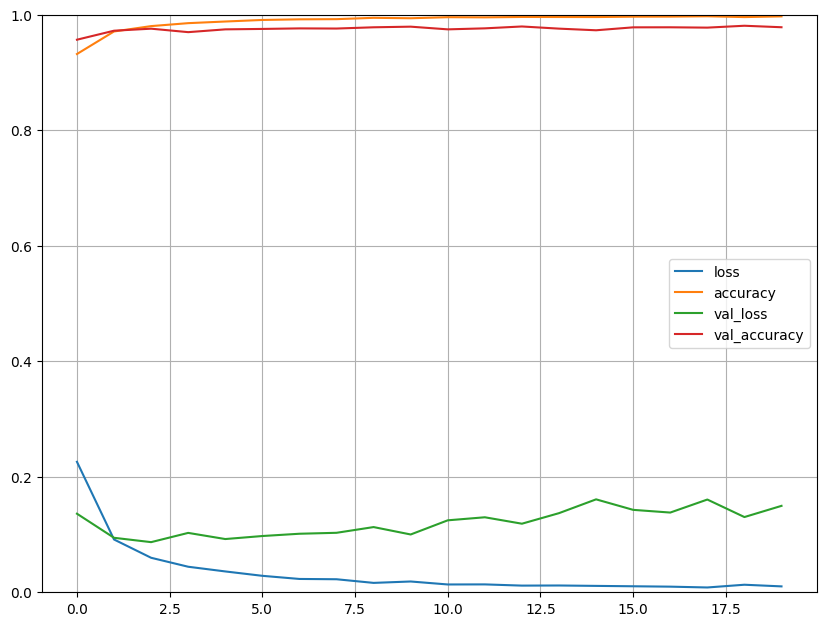

313/313 [==============================] - 1s 2ms/step - loss: 0.1263 - accuracy: 0.9779


[0.12629450857639313, 0.9779000282287598]

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(XTest, yTest)

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 784),
                                 keras.layers.Dense(300, activation = "elu"),
                                 keras.layers.Dense(100, activation = "elu"),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2603 - accuracy: 0.9210 - val_loss: 0.1419 - val_accuracy: 0.9571
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1164 - accuracy: 0.9640 - val_loss: 0.1354 - val_accuracy: 0.9593
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9738 - val_loss: 0.0961 - val_accuracy: 0.9728
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9798 - val_loss: 0.1005 - val_accuracy: 0.9735
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0469 - accuracy: 0.9848 - val_loss: 0.1198 - val_accuracy: 0.9649
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.1111 - val_accuracy: 0.9743
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.1207 - val_accuracy:

So, using Adam and ELU together also converged fast and then started overfitting

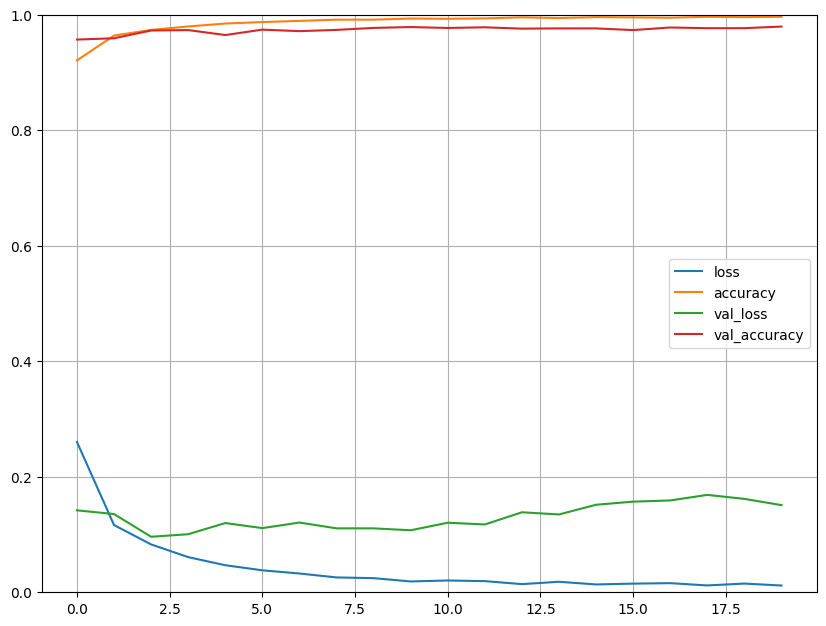

313/313 [==============================] - 1s 3ms/step - loss: 0.1310 - accuracy: 0.9792


[0.13096976280212402, 0.979200005531311]

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(XTest, yTest)

Let's try with just ELU

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 784),
                                 keras.layers.Dense(300, activation = "elu"),
                                 keras.layers.Dense(100, activation = "elu"),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5486 - accuracy: 0.8520 - val_loss: 0.3592 - val_accuracy: 0.8981
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3197 - accuracy: 0.9066 - val_loss: 0.3075 - val_accuracy: 0.9126
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2826 - accuracy: 0.9186 - val_loss: 0.2776 - val_accuracy: 0.9210
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9267 - val_loss: 0.2608 - val_accuracy: 0.9243
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2350 - accuracy: 0.9336 - val_loss: 0.2406 - val_accuracy: 0.9302
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2153 - accuracy: 0.9384 - val_loss: 0.2254 - val_accuracy: 0.9353
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9435 - val_loss: 0.2078 - val_accuracy:

So ELU performed slightly worse than ReLU with a minimal training time improvement

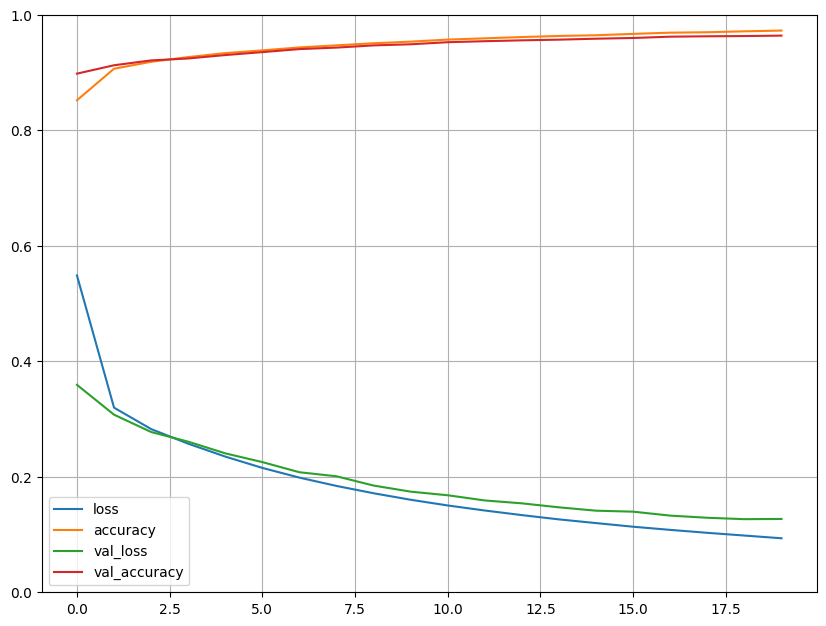

313/313 [==============================] - 1s 2ms/step - loss: 0.1141 - accuracy: 0.9659


[0.11412040144205093, 0.9659000039100647]

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(XTest, yTest)

Let's try a different dataset with more dimensions

In [ ]:
(XFull, yFull), (XTest, yTest) = cifar10.load_data()

In [ ]:
XFull.shape, yFull.shape, XTest.shape, yTest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

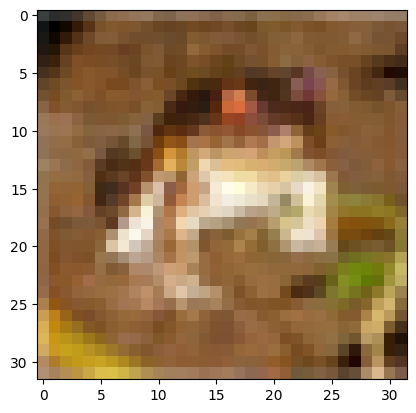

In [ ]:
plt.imshow(XFull[0])

In [ ]:
XFull, XTest = XFull/255, XTest/255
yFull, yTest = yFull.flatten(), yTest.flatten()

In [ ]:
XFull, XTest = XFull.reshape(XFull.shape[0], XFull.shape[1]*XFull.shape[2]*XFull.shape[3]), XTest.reshape(XTest.shape[0], XTest.shape[1] * XTest.shape[2] * XTest.shape[3])

In [ ]:
XTrain, XValid, yTrain, yValid = train_test_split(XFull, yFull, train_size=0.8)

In [ ]:
XTrain.shape, yTrain.shape

((40000, 3072), (40000,))

Let's try with the first model

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 3072),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9128 - accuracy: 0.3141 - val_loss: 1.7825 - val_accuracy: 0.3747
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7301 - accuracy: 0.3873 - val_loss: 1.6999 - val_accuracy: 0.3975
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6505 - accuracy: 0.4142 - val_loss: 1.6489 - val_accuracy: 0.4124
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5928 - accuracy: 0.4376 - val_loss: 1.5977 - val_accuracy: 0.4337
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5482 - accuracy: 0.4522 - val_loss: 1.5954 - val_accuracy: 0.4335
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5098 - accuracy: 0.4645 - val_loss: 1.5411 - val_accuracy: 0.4506
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4787 - accuracy: 0.4762 - val_loss: 1.5669 - val_accuracy:

So, this model is either not suitable for coloured images or there is not enough complexity.

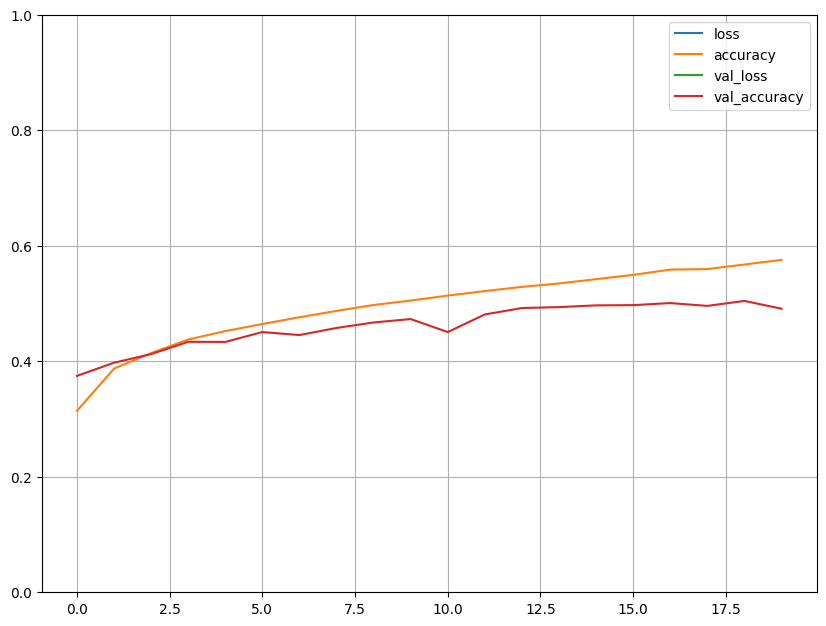

313/313 [==============================] - 1s 2ms/step - loss: 1.4162 - accuracy: 0.4997


[1.4161561727523804, 0.49970000982284546]

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(XTest, yTest)

Let's try more layers along with Batch Normalization

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 3072),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 20, validation_data = [XValid, yValid])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/20
1250/1250 [==============================] - 11s 7ms/step - loss: 1.7757 - accuracy: 0.3746 - val_loss: 1.5820 - val_accuracy: 0.4374
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5278 - accuracy: 0.4584 - val_loss: 1.4939 - val_accuracy: 0.4738
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4336 - accuracy: 0.4930 - val_loss: 1.4582 - val_accuracy: 0.4889
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3562 - accuracy: 0.5207 - val_loss: 1.4229 - val_accuracy: 0.4998
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2932 - accuracy: 0.5427 - val_loss: 1.4153 - val_accuracy: 0.5087
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2380 - accuracy: 0.5630 - val_loss: 1.4135 - val_accuracy: 0.5083
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1924 - accuracy: 0.5788 - val_loss: 1.3923 - val_accuracy

Much better but still not good enough

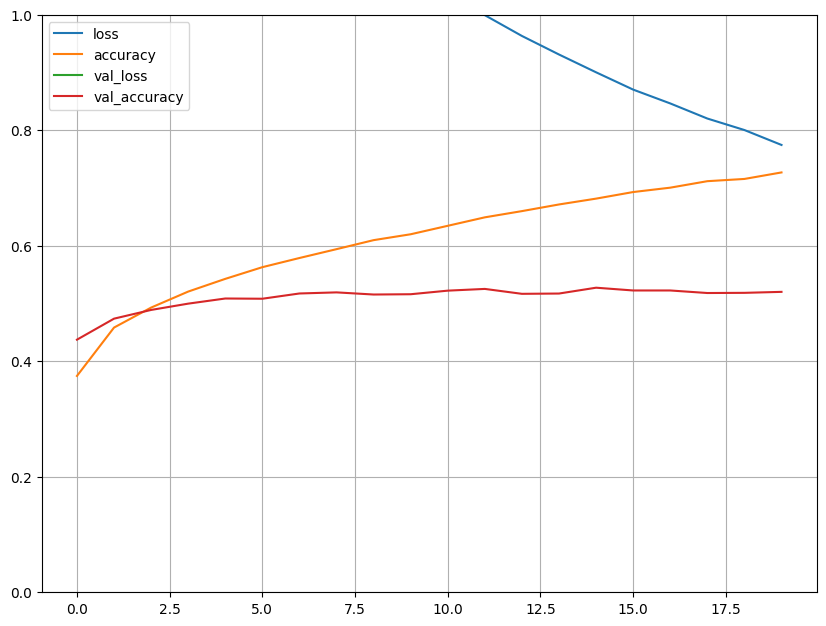

313/313 [==============================] - 1s 2ms/step - loss: 1.4860 - accuracy: 0.5210


[1.486034870147705, 0.5210000276565552]

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

model.evaluate(XTest, yTest)

Should probably make the graph and evaluation a function

In [ ]:
def graphEvaluate(model, modelHistory):
  pd.DataFrame(modelHistory.history).plot(figsize = (10, 7.5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()
  print(model.evaluate(XTest, yTest))

Let's try with more neurons and EarlyStopping callback

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=15)

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = 3072),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(1500, activati
                                                    on = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(800, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(100, activation = "relu"),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(10, activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 50, validation_data = [XValid, yValid], callbacks = [es])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/50
1250/1250 [==============================] - 10s 7ms/step - loss: 1.7430 - accuracy: 0.3896 - val_loss: 1.5401 - val_accuracy: 0.4542
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4613 - accuracy: 0.4805 - val_loss: 1.4590 - val_accuracy: 0.4848
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3375 - accuracy: 0.5289 - val_loss: 1.4283 - val_accuracy: 0.5027
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2378 - accuracy: 0.5641 - val_loss: 1.4166 - val_accuracy: 0.5014
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1468 - accuracy: 0.5969 - val_loss: 1.4175 - val_accuracy: 0.5077
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0771 - accuracy: 0.6209 - val_loss: 1.4341 - val_accuracy: 0.5203
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0121 - accuracy: 0.6453 - val_loss: 1.4128 - val_accuracy

That's quite the overfit

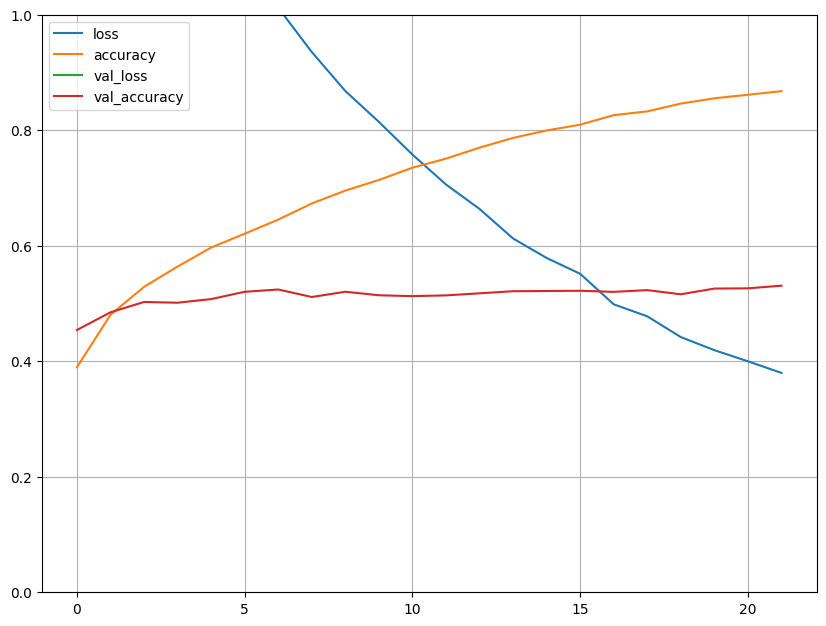

313/313 [==============================] - 1s 3ms/step - loss: 1.8421 - accuracy: 0.5267
[1.8420783281326294, 0.5267000198364258]


In [ ]:
graphEvaluate(model, history)

Let's try that model but with regularization and also ELU

In [ ]:
RegularizedDense = partial(keras.layers.Dense, activation = "elu", kernel_initializer = "he_normal", kernel_regularizer = keras.regularizers.l2(0.01))

In [ ]:
start = monotonic()

model = keras.models.Sequential([keras.layers.Input(shape = [XTrain.shape[1]]),
                                 RegularizedDense(1000),
                                 RegularizedDense(300),
                                 RegularizedDense(100),
                                 keras.layers.Dense(10, activation = "softmax", kernel_initializer = "glorot_uniform")])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 50, validation_data = [XValid, yValid], callbacks = [es])

print(f"Time elapsed: {monotonic() - start}")

Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 4.9803 - accuracy: 0.2434 - val_loss: 2.4021 - val_accuracy: 0.2391
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1875 - accuracy: 0.2704 - val_loss: 2.1311 - val_accuracy: 0.2860
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1081 - accuracy: 0.2849 - val_loss: 2.0731 - val_accuracy: 0.3015
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0857 - accuracy: 0.2944 - val_loss: 2.0782 - val_accuracy: 0.2881
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0810 - accuracy: 0.3016 - val_loss: 2.0314 - val_accuracy: 0.3045
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0749 - accuracy: 0.3033 - val_loss: 2.1364 - val_accuracy: 0.2831
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0613 - accuracy: 0.3096 - val_loss: 2.0341 - val_accuracy:

That was quite bad

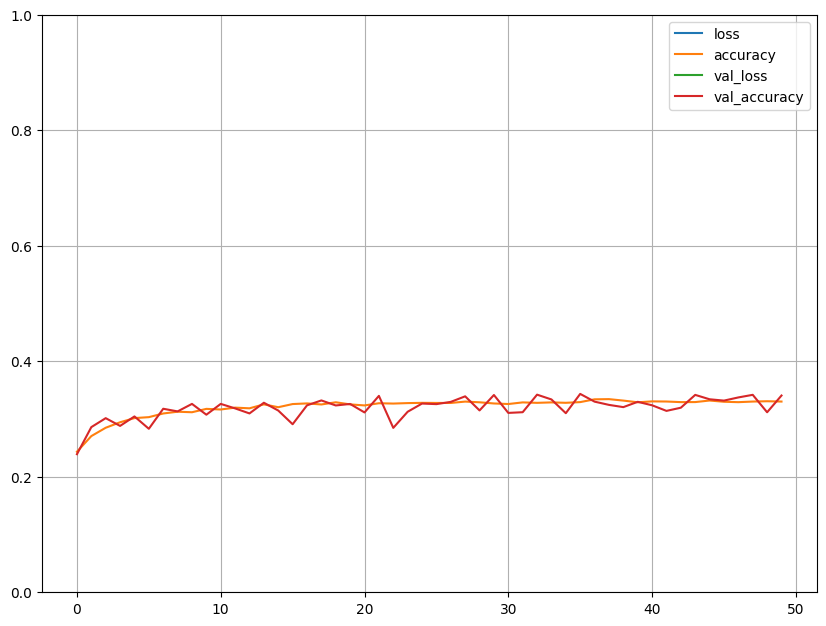

313/313 [==============================] - 1s 2ms/step - loss: 1.9475 - accuracy: 0.3474
[1.947509527206421, 0.3474000096321106]


In [ ]:
graphEvaluate(model, history)

Let's try CNNs since even the best ANN didn't go above approx 50% on test

In [ ]:
(XFull, yFull), (XTest, yTest) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
XFull, XTest = XFull/255, XTest/255
XTrain, XValid, yTrain, yValid = train_test_split(XFull, yFull, train_size=0.8)
XTrain.shape, XValid.shape, yTrain.shape, yValid.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64, kernel_size = 7, activation = "relu", padding = "same", input_shape = XTrain[0].shape),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 30, validation_data = [XValid, yValid])

Much better than a simple ANN but still not good enough

In [ ]:
graphEvaluate(model, history)

Trying another model from the internet

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation = "relu", padding = "same", input_shape = XTrain[0].shape),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 3, activation = "relu", padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),

    keras.layers.Conv2D(64, 3, activation = "relu", padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 3, activation = "relu", padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),

    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1024, activation = "relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
history = model.fit(XTrain, yTrain, epochs = 50, validation_data = [XValid, yValid])

Epoch 1/50
1250/1250 [==============================] - 33s 16ms/step - loss: 1.3942 - accuracy: 0.5257 - val_loss: 1.0993 - val_accuracy: 0.6080
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9043 - accuracy: 0.6827 - val_loss: 1.0930 - val_accuracy: 0.6327
Epoch 3/50
1250/1250 [==============================] - 13s 11ms/step - loss: 0.7495 - accuracy: 0.7405 - val_loss: 0.8889 - val_accuracy: 0.7097
Epoch 4/50
1250/1250 [==============================] - 16s 13ms/step - loss: 0.6314 - accuracy: 0.7814 - val_loss: 0.7527 - val_accuracy: 0.7464
Epoch 5/50
1250/1250 [==============================] - 14s 11ms/step - loss: 0.5412 - accuracy: 0.8138 - val_loss: 0.6453 - val_accuracy: 0.7822
Epoch 6/50
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4636 - accuracy: 0.8394 - val_loss: 0.7021 - val_accuracy: 0.7738
Epoch 7/50
1250/1250 [==============================] - 12s 10ms/step - loss: 0.3814 - accuracy: 0.8679 - val_loss: 0.7897 -

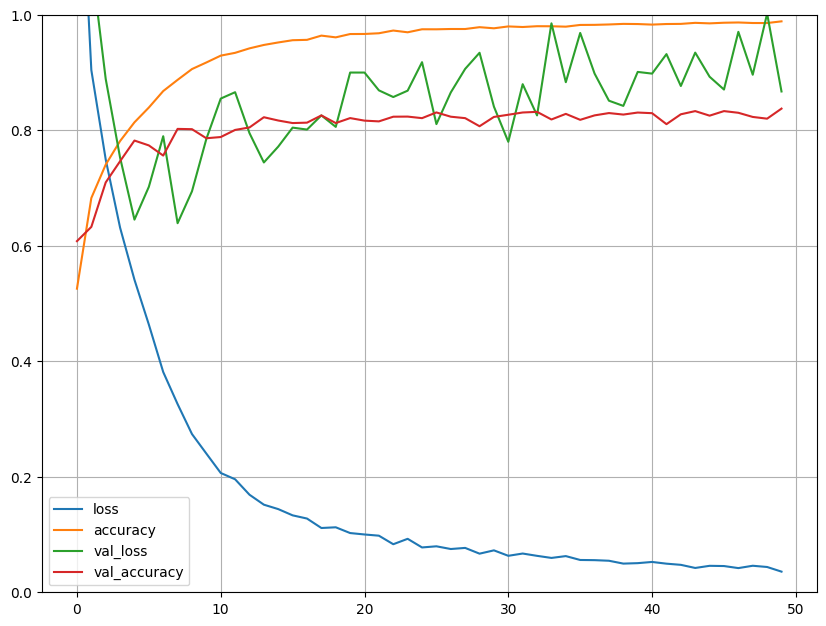

313/313 [==============================] - 1s 4ms/step - loss: 0.9149 - accuracy: 0.8272
[0.9149186611175537, 0.8271999955177307]


In [ ]:
graphEvaluate(model, history)

Data Augmentation

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True
)

train_generator = data_generator.flow(XTrain, yTrain, batch_size)
steps_per_epoch = XTrain.shape[0] // batch_size

history = model.fit(train_generator, validation_data = (XValid, yValid), steps_per_epoch = steps_per_epoch, epochs = 50)

Epoch 1/50
1250/1250 [==============================] - 30s 23ms/step - loss: 0.6073 - accuracy: 0.8056 - val_loss: 0.5337 - val_accuracy: 0.8360
Epoch 2/50
1250/1250 [==============================] - 28s 23ms/step - loss: 0.4781 - accuracy: 0.8426 - val_loss: 0.4920 - val_accuracy: 0.8362
Epoch 3/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.4282 - accuracy: 0.8572 - val_loss: 0.4413 - val_accuracy: 0.8575
Epoch 4/50
1250/1250 [==============================] - 28s 22ms/step - loss: 0.4116 - accuracy: 0.8637 - val_loss: 0.4474 - val_accuracy: 0.8493
Epoch 5/50
1250/1250 [==============================] - 28s 22ms/step - loss: 0.3886 - accuracy: 0.8685 - val_loss: 0.4825 - val_accuracy: 0.8530
Epoch 6/50
1250/1250 [==============================] - 29s 23ms/step - loss: 0.3791 - accuracy: 0.8727 - val_loss: 0.4769 - val_accuracy: 0.8443
Epoch 7/50
1250/1250 [==============================] - 28s 22ms/step - loss: 0.3559 - accuracy: 0.8798 - val_loss: 0.4578 -

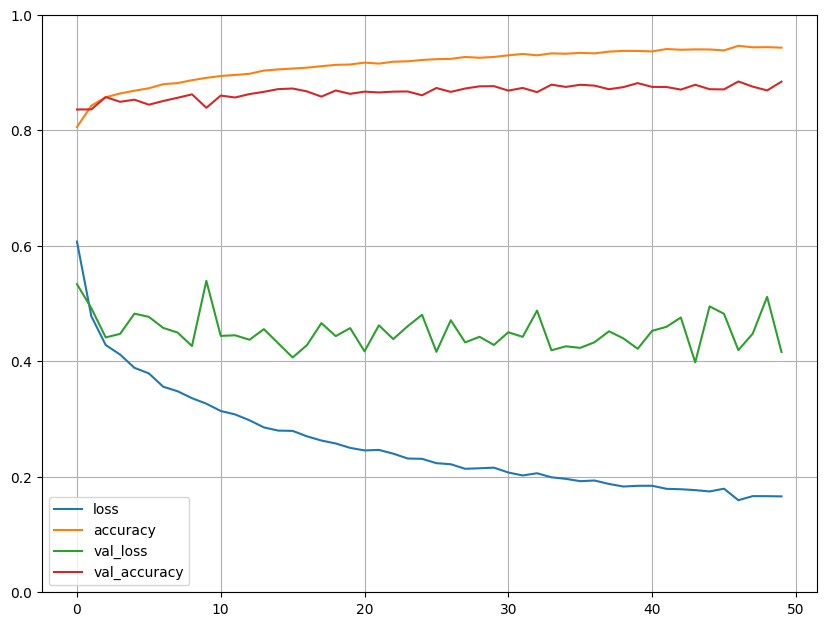

313/313 [==============================] - 1s 4ms/step - loss: 0.4624 - accuracy: 0.8761
[0.46235233545303345, 0.8761000037193298]


In [ ]:
graphEvaluate(model, history)